# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import BayesianEstimator, performance_stats, get_date_range, METRICS

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'

# Data

In [4]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

242 securities from 2005-01-31 to 2025-02-28 uploaded.
REMINDER: 242 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250319.csv loaded


In [5]:
df_prices = fund.df_prices
df_prices_fees = fund._get_prices_after_fee(df_prices, fee)

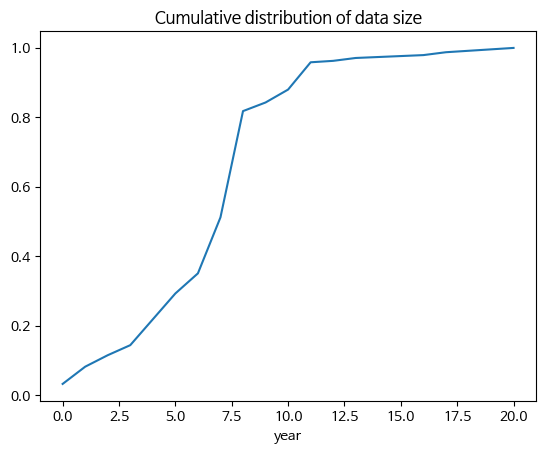

In [6]:
df_prc = df_prices.resample('M').last()
days_in_year = fund.days_in_year
df_year = get_date_range(df_prc).loc[:, 'n'].div(days_in_year).rename('year')
_ = df_year.groupby(df_year.round()).count().cumsum().div(df_year.count()).plot(title='Cumulative distribution of data size')

# Bayesian

*revert data to original montly for estimation*

In [7]:
days_in_year = 12
df_prc = df_prices_fees.resample('M').last()

## 1 Year Rate of Return

In [ ]:
freq_year = 1
min_year = 4 # min data size

In [ ]:
file_est = f'fund_f{freq_year}y_s{min_year}y_250109'
file_est

### Split

In [ ]:
tickers = df_year.loc[df_year > min_year].index.to_list()
len(tickers)

In [ ]:
n = freq_year * days_in_year
df_p = df_prc[tickers]
df_train = df_p.iloc[:-n]
df_val = df_p.iloc[-n:]

In [ ]:
len(df_p), len(df_train), len(df_val)

### Estimate

In [ ]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)

*Sample*

In [ ]:
freq = freq_year * days_in_year
be = BayesianEstimator(df_train, **kw)
be.bayesian_sample(freq=freq, file=file_est, path=path_data)

*Load*

In [ ]:
be = BayesianEstimator.create(file_est, path_data, **kw)

#### Visualize

In [ ]:
#xlims = None
xlims = [(-0.3, 0.4), (-1, 2.5)]
_ = be.plot_returns(max_legend=10, xlims=xlims)

### Compare

In [ ]:
#var_name = 'cagr'
var_name = 'total_return' # freq 1y
ms = ['mean','sd','hdi_3%','hdi_97%']
ascending = [False, True, False, False]

df_s = be.bayesian_summary(var_name).droplevel(0)
pick = lambda i, n=5, df=df_s: df.sort_values(ms[i], ascending=ascending[i]).iloc[:n].index.to_list()

In [ ]:
#df_s.isna().any(axis=1).sum()
#df_s = df_s.dropna()

In [ ]:
t0 = pick(0)
kw = dict(
    ref_val='default', 
    figsize=(12,2.5), textsize=9, grid=(1,5), length=16)
be.plot_posterior(var_name, t0, **kw)

In [ ]:
t1 = pick(1)
be.plot_posterior(var_name, t1, **kw)

In [ ]:
t2 = pick(2)
be.plot_posterior(var_name, t2, **kw)

In [ ]:
t3 = pick(3)
be.plot_posterior(var_name, t3, **kw)

### Validate

In [ ]:
m = var_name
start = df_val.index.min()
fund.plot(t0, fee=fee, base=1000, metric=m, start_date=start)

In [ ]:
fund.plot(t2, fee=fee, base=1000, metric=m, start_date=start)

## 3 Year Rate of Return

### Min years 7

In [ ]:
freq_year = 3
min_year = 7 # min data size

In [ ]:
file_est = f'fund_f{freq_year}y_s{min_year}y_250109'
file_est

#### Split

In [ ]:
tickers = df_year.loc[df_year > min_year].index.to_list()
len(tickers)

In [ ]:
n = freq_year * days_in_year
df_p = df_prc[tickers]
df_train = df_p.iloc[:-n]
df_val = df_p.iloc[-n:]

In [ ]:
len(df_p), len(df_train), len(df_val)

#### Estimate

In [ ]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)

*Sample*

In [ ]:
freq = freq_year * days_in_year
be = BayesianEstimator(df_train, **kw)
be.bayesian_sample(freq=freq, file=file_est, path=path_data)

*Load*

In [ ]:
be = BayesianEstimator.create(file_est, path_data, **kw)

##### Visualize

In [ ]:
#xlims = None
xlims = [(-0.5, 1.5), (-0.5, 6)]
_ = be.plot_returns(max_legend=10, xlims=xlims)

#### Compare

In [ ]:
#var_name = 'cagr'
var_name = 'total_return'
ms = ['mean','sd','hdi_3%','hdi_97%']
ascending = [False, True, False, False]

df_s = be.bayesian_summary(var_name).droplevel(0)
pick = lambda i, n=5, df=df_s: df.sort_values(ms[i], ascending=ascending[i]).iloc[:n].index.to_list()

In [ ]:
#df_s.isna().any(axis=1).sum()
#df_s = df_s.dropna()

In [ ]:
t0 = pick(0)
kw = dict(
    ref_val='default', 
    figsize=(12,2.5), textsize=9, grid=(1,5), length=16)
be.plot_posterior(var_name, t0, **kw)

In [ ]:
t2 = pick(2)
be.plot_posterior(var_name, t2, **kw)

In [ ]:
t3 = pick(3)
be.plot_posterior(var_name, t3, **kw)

#### Validate

In [ ]:
m = var_name
start = df_val.index.min()
fund.plot(t2, fee=fee, base=1000, metric=m, start_date=start)

In [ ]:
fund.plot(t0, fee=fee, base=1000, metric=m, start_date=start)

### Min years 3 w/o Validation

In [ ]:
freq_year = 3
min_year = 3 # min data size

In [ ]:
file_base = f'fund_f{freq_year}y_s{min_year}y'
file_est_old = f'fund_f{freq_year}y_s{min_year}y_250109'
file_est = f'fund_f{freq_year}y_s{min_year}y_250207'
file_est

In [ ]:
file_base = f'fund_f{freq_year}y_s{min_year}y'
file_est_old = f'{file_base}_250109'
file_est = f'{file_base}_250207'
file_est

#### Split

In [ ]:
be = BayesianEstimator.create(file_est_old, path_data)
tickers = be.df_prices.columns
# remove tickers tested
tickers = df_year.loc[df_year > min_year].index.difference(tickers)
len(tickers)

*no validation*

In [ ]:
df_p = df_prc[tickers]
df_train = df_p

In [ ]:
len(df_train)

#### Estimate

In [ ]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)

*Sample*

In [ ]:
freq = freq_year * days_in_year
be = BayesianEstimator(df_train, **kw)
# uncomment for new sampling 
be.bayesian_sample(freq=freq, file=file_est, path=path_data)

*Load all estimates*

In [ ]:
be = BayesianEstimator.create(file_base, path_data, **kw)

##### Visualize

In [ ]:
xlims = None
#xlims = [(-0.3, 0.8), (-4, 10)]
_ = be.plot_returns(max_legend=10, xlims=xlims)

#### Compare

In [ ]:
var_name = 'total_return'
ms = ['mean','sd','hdi_3%','hdi_97%']
ascending = [False, True, False, False]

df_s = be.bayesian_summary(var_name).droplevel(0)
pick = lambda i, n=5: df_s.sort_values(ms[i], ascending=ascending[i]).iloc[:n].index.to_list()
df_s

In [ ]:
t0 = pick(0)
kw = dict(
    plotly=False,
    ref_val='default', 
    figsize=(12,3), textsize=9, grid=(1,5), length=16)
be.plot_posterior(var_name, t0, **kw)

In [ ]:
t0 = pick(0)
be.plot_posterior(var_name, t0)

In [ ]:
t2 = pick(2)
be.plot_posterior(var_name, t2)

In [ ]:
t3 = pick(3)
be.plot_posterior(var_name, t3)

*choice from frequentist stats*

In [ ]:
n = 5
t = be.get_stats(var_name).T.sort_values(var_name, ascending=False).iloc[:n].index.to_list()
be.plot_posterior(var_name, t)

#### Cases

##### TDF

In [ ]:
from math import ceil
tdf = 'tdf2040'
t9 = pick(2, 99)
t9 = [x for x in t9 if tdf in fund.security_names[x].lower()]
grid = (ceil(len(t9)/5), 5)
#be.plot_posterior(var_name, t9, **{**kw, 'grid':grid, 'figsize':(12,3*grid[0])})
be.plot_posterior(var_name, t9)

##### Asia

In [ ]:
t9 = ['K55364CF7048','K55303BT4176','K55234BY9966','K55235BW6799']
grid = (1,4)
#be.plot_posterior(var_name, t9, **{**kw, 'grid':grid, 'figsize':(12,3*grid[0])})
be.plot_posterior(var_name, t9)

In [ ]:
fund.get_names(t9)

### Min years 5

In [8]:
freq_year = 3
min_year = 5 # min data size

In [10]:
file_est = f'fund_f{freq_year}y_s{min_year}y_250228'
file_est

'fund_f3y_s5y_250228'

#### Split

In [11]:
tickers = df_year.loc[df_year > min_year].index.to_list()
len(tickers)

180

*no validation*

In [12]:
df_p = df_prc[tickers]
df_train = df_p

In [13]:
len(df_train)

242

#### Estimate

In [14]:
kw = dict(
    days_in_year = days_in_year,
    security_names = fund.security_names
)

*Sample*

In [15]:
freq = freq_year * days_in_year
be = BayesianEstimator(df_train, **kw)
be.bayesian_sample(freq=freq, file=file_est, path=path_data)

Running batch 1 ...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, total_return]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 148 seconds.


Running batch 2 ...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, total_return]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 136 seconds.


Running batch 3 ...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, total_return]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 153 seconds.


Running batch 4 ...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_two, mu, sig, total_return]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 95 seconds.


data/fund_f3y_s5y_250228.pkl saved
Execution time of bayesian_sample: 1199.60 secs


*Load*

In [ ]:
be = BayesianEstimator.create(file_est, path_data, **kw)

##### Visualize

In [ ]:
xlims = None
#xlims = [(-0.5, 1.5), (-0.5, 6)]
_ = be.plot_returns(max_legend=10, xlims=xlims)

#### Compare

In [ ]:
#var_name = 'cagr'
var_name = 'total_return'
ms = ['mean','sd','hdi_3%','hdi_97%']
ascending = [False, True, False, False]

df_s = be.bayesian_summary(var_name).droplevel(0)
pick = lambda i, n=5, df=df_s: df.sort_values(ms[i], ascending=ascending[i]).iloc[:n].index.to_list()

In [ ]:
#df_s.isna().any(axis=1).sum()
#df_s = df_s.dropna()

In [ ]:
t0 = pick(0)
kw = dict(
    ref_val='default', 
    figsize=(12,2.5), textsize=9, grid=(1,5), length=16)
be.plot_posterior(var_name, t0, **kw)

In [ ]:
t2 = pick(2)
be.plot_posterior(var_name, t2, **kw)

In [ ]:
t3 = pick(3)
be.plot_posterior(var_name, t3, **kw)

#### Validate

In [ ]:
m = var_name
start = df_val.index.min()
fund.plot(t2, fee=fee, base=1000, metric=m, start_date=start)

In [ ]:
fund.plot(t0, fee=fee, base=1000, metric=m, start_date=start)

# Visualize

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_dash import create_app, add_density_plot, add_hdi_plot, add_scatter_plot

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'
file_cost = 'transaction_cost'

## Data

### Price

In [3]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded


In [4]:
df_prices = fund.df_prices
df_prices_fees = fund._get_prices_after_fee(df_prices, fee)

In [5]:
df_prc = df_prices.resample('M').last()
df_prc_f = df_prices_fees.resample('M').last()
fund_name = fund.security_names

In [6]:
tickers = None
#tickers = ['K55364CF7048','K55303BT4176','K55234BY9966','K55235BW6799']
#tickers = t9
#tickers = ['K55206C95800', 'K55301BU6139','K55364CF7048','K55234BY9966','K55213C50702','K55234DF3150','K55301BU6253']
#tdf = 'tdf2035'
#tickers = [k for k,v in fund_name.items() if tdf in v.lower()]

### Scatter

In [7]:
from pf_dash import get_hdi
import pandas as pd

file = 'fund_f3y_s3y'
path = 'data'
df = get_hdi(file, path, tickers=tickers, to_dict=False)
df.head()

fund_f3y_s3y.pkl* loaded


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ticker,,,,,,,,,
KR5101888398,0.079,0.027,0.029,0.131,0.000,0.000,8872.0,2719.0,1.0
KR5370AP9956,0.044,0.087,-0.107,0.214,0.001,0.001,9362.0,2617.0,1.0
KR5236AS4826,0.081,0.076,-0.070,0.221,0.001,0.001,7581.0,2640.0,1.0
K55105BH1010,0.104,0.151,-0.167,0.393,0.002,0.002,8777.0,3110.0,1.0
K55301BM7640,0.208,0.130,-0.029,0.460,0.002,0.001,7049.0,2868.0,1.0


In [8]:
#df.to_csv('pages/funds_bayesian_ret3y_250207.csv')

### Category

In [9]:
import pandas as pd

file = 'funds_categories.csv'
path = 'data'
df_cat_all = pd.read_csv(f'{path}/{file}').set_index('ticker')

In [10]:
df_cat = df_cat_all.iloc[:, 1:]
df_cat.columns

Index(['seller', 'account', 'manager', 'asset', 'strategy', 'region'], dtype='object')

## Plot

In [11]:
tickers = None
#tickers = ['K55101BT4402', 'K55101BT4428', 'K55101BT4444', 'K55101BT7397']
app, get_tickers = create_app(df_prc, df_prc_f, df_cat,
                              fund_name=fund_name, tickers=tickers
                             )

In [12]:
kw_dst = dict(
    file = 'fund_f3y_s3y',
    path = 'data',
    tickers = tickers,
    fund_name = fund_name
)
kw_hdi = dict(
    #sort_by = 'mean', ascending=False, # default
    #sort_by = 'sd', ascending=True,
    line_width=3
)
#add_density_plot(app, get_tickers, **kw_dst)
add_hdi_plot(app, get_tickers, **kw_dst, **kw_hdi)

fund_f3y_s3y.pkl* loaded


In [13]:
add_scatter_plot(app, get_tickers, df_cat=df_cat, **kw_dst)

fund_f3y_s3y.pkl* loaded


In [14]:
app.run_server(debug=True, port=8051)

# Categories

## Data

In [15]:
from pf_dash import get_hdi

file = 'fund_f3y_s3y'
path = 'data'
df_ret = get_hdi(file, path, tickers=None, to_dict=False)
df_ret.head()

fund_f3y_s3y.pkl* loaded


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ticker,,,,,,,,,
KR5101888398,0.079,0.027,0.029,0.131,0.000,0.000,8872.0,2719.0,1.0
KR5370AP9956,0.044,0.087,-0.107,0.214,0.001,0.001,9362.0,2617.0,1.0
KR5236AS4826,0.081,0.076,-0.070,0.221,0.001,0.001,7581.0,2640.0,1.0
K55105BH1010,0.104,0.151,-0.167,0.393,0.002,0.002,8777.0,3110.0,1.0
K55301BM7640,0.208,0.130,-0.029,0.460,0.002,0.001,7049.0,2868.0,1.0


In [13]:
# load labels
import pandas as pd

file = 'funds_labels.csv'
path_data = 'data'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
#df_labels['label'].str.split('_', expand=True).stack().value_counts().sort_index().to_dict()
df_labels.head()

,name,desc,label
ticker,,,
K55101BT4402,한국투자TDF알아서2030증권투자신탁(주식혼합-재간접형)(C-Re),"""1. 투자목적\n- 이 투자신탁은 장기적으로 투자자의 노후자금 마련을 위하여 국내...",TDF_주식_혼합_한국투자_글로벌
K55101BT4428,한국투자TDF알아서2035증권투자신탁(주식혼합-재간접형)(C-Re),"""1. 투자목적\n- 이 투자신탁은 장기적으로 투자자의 노후자금 마련을 위하여 국내...",TDF_주식_혼합_한국투자_글로벌
K55101BT4444,한국투자TDF알아서2045증권투자신탁(주식혼합-재간접형)(C-Re),"""1. 투자목적\n- 이 투자신탁은 장기적으로 투자자의 노후자금 마련을 위하여 국내...",TDF_주식_혼합_한국투자_글로벌
K55101BT7397,한국투자TDF알아서2040증권투자신탁(주식혼합-재간접형)(C-Re),"""1. 투자목적\n- 이 투자신탁은 장기적으로 투자자의 노후자금 마련을 위하여 국내...",TDF_주식_혼합_한국투자_글로벌
K55101BY3944,한국투자TIF알아서평생소득증권자투자신탁(채권혼합-재간접형)(C-Re),"""1. 투자목적\n- 이 투자신탁은 국내ㆍ외 집합투자증권에 주로 투자하는 모투자신탁...",TIF_채권_혼합_한국투자_글로벌


In [81]:
import pandas as pd

file = 'funds_categories_250317.csv'
path = 'data'
df_cat = pd.read_csv(f'{path}/{file}').set_index('ticker')
df_cat.columns

Index(['name', 'seller', 'account', 'manager', 'asset', 'strategy', 'region'], dtype='object')

### Review

In [67]:
df_cat.loc[df_cat['name'].str.lower().str.contains('kcgi')]

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55365BT3694,kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2,기업은행,퇴직연금,kcgi,주식,주식,국내


In [82]:
df = {
    'KR5303AL4276': ['마이다스거북이90증권자투자신탁 1(주식)Ce', '기업은행', '일반', '마이다스', '주식', '주식', '국내'],
    'KR5207AW8081': ['교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE', '기업은행', '일반', '교보악사', '채권', '채권', '국내'],
    'KR5232AT9794': ['NH-Amundi국채10년인덱스증권자투자신탁[채권]ClassCe', '기업은행', '일반', 'NH-Amundi', '채권', '인덱스', '국내'],
    'K55101E95072': ['한국투자미국장기국채증권자투자신탁H(채권-재간접형)(C-e)', '기업은행', '일반', '한국투자', '채권', '채권', '미국'],
    'KR5225A89035': ['미래에셋배당커버드콜액티브증권자투자신탁(주식혼합)종류C-e', '기업은행', '일반', '미래에셋', '혼합', '배당', '국내'],
    'K55301BA7040': ['미래에셋글로벌솔루션증권자투자신탁(주식-재간접형)종류C-e', '기업은행', '일반', '미래에셋', '주식', '주식', '글로벌'],
    'KR5236AN0936': ['한국밸류10년투자배당증권자투자신탁(주식)종류C-E', '기업은행', '일반', '한국밸류', '주식', '배당', '국내'],
    'KR5209950314': ['신영밸류고배당증권자투자신탁(주식)e형', '기업은행', '일반', '신영', '주식', '배당', '국내'],
    'KR5234769887': ['IBK골드마이닝증권자투자신탁 1[주식]종류Ce', '기업은행', '일반', 'IBK', '주식', '원자재', '글로벌'],
    'K55240D58714': ['BNK삼성전자중소형증권투자신탁 1(주식)ClassC-e', '기업은행', '일반', 'BNK', '주식', '주식', '국내'],
    'K55306BO8724': ['다올글로벌빅테크1등주증권투자신탁[주식]종류Ce', '기업은행', '일반', '다올', '주식', '기술', '글로벌'],
    'KR5101753360': ['한국투자네비게이터증권투자신탁 1(주식)(C-e)', '기업은행', '일반', '한국투자', '주식', '주식', '국내'],
    'KR5365AJ4440': ['KCGI코리아증권투자신탁 1[주식]종류Ce', '기업은행', '일반', 'KCGI', '주식', '주식', '국내'],
    #'': ['', '기업은행', '일반', '', '', '', ''], # template
}
df = pd.DataFrame().from_dict(df, orient='index', columns=df_cat.columns).rename_axis('ticker')
df_cat = pd.concat([df_cat, df])
df_cat.index.duplicated().any()

False

In [63]:
cat = 'strategy' #'manager' 'region' #'strategy'
df_cat[cat].unique()

array(['TDF', 'TIF', '인덱스', '주식', 'EMP', '배당', '채권', '기술', 'ESG', 'MMF',
       '리츠', '원자재'], dtype=object)

In [83]:
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
KR5234769887,IBK골드마이닝증권자투자신탁 1[주식]종류Ce,기업은행,일반,IBK,주식,원자재,글로벌
K55240D58714,BNK삼성전자중소형증권투자신탁 1(주식)ClassC-e,기업은행,일반,BNK,주식,주식,국내
K55306BO8724,다올글로벌빅테크1등주증권투자신탁[주식]종류Ce,기업은행,일반,다올,주식,기술,글로벌
KR5101753360,한국투자네비게이터증권투자신탁 1(주식)(C-e),기업은행,일반,한국투자,주식,주식,국내
KR5365AJ4440,KCGI코리아증권투자신탁 1[주식]종류Ce,기업은행,일반,KCGI,주식,주식,국내


In [84]:
file = 'funds_categories.csv'
path = 'data'
df_cat.to_csv(f'{path}/{file}')

## Labeling

In [39]:
import pandas as pd

def set_groups(group, *words, cat=None, df_cat=None, column='name', casesense=True, overwrite=False, not_prefix='~'):
    df_c = df_cat.copy()
    df_w = df_c[column] if casesense else df_c[column].str.lower()
    func = lambda x: df_w.index[df_w.fillna('N/A').str.contains(x)]
    tkrs = df_w.index
    if len(words) == 0:
        words = [group]
    for w in words:
        w = w if casesense else w.lower()
        if w.startswith(not_prefix):
            tkrs = tkrs.difference(func(w[1:]))
        else:
            tkrs = tkrs.intersection(func(w))
    # check if rows to update is none    
    if not overwrite and cat in df_c.columns:
        if df_c.loc[tkrs, cat].notna().any():
            print(f'ERROR: check tickers for {group}')
            return tkrs
    df_c.loc[tkrs, cat] = group
    return df_c

In [40]:
df_labels['label'].str.split('_', expand=True).stack().value_counts().sort_index().to_dict()

{'AB': 3,
 'BNK': 1,
 'EMP': 9,
 'ESG': 12,
 'IBK': 10,
 'KB': 11,
 'KCGI': 1,
 'MMF': 4,
 'NH-AMUNDI': 4,
 'TDF': 62,
 'TIF': 2,
 'UH': 8,
 'iM에셋': 2,
 '가치': 11,
 '공모주': 3,
 '광업': 1,
 '교보악사': 5,
 '국내': 6,
 '글로벌': 118,
 '금': 1,
 '금융': 2,
 '기술': 5,
 '다올': 4,
 '대신': 1,
 '로보틱스': 3,
 '리츠': 2,
 '마이다스': 4,
 '미국': 17,
 '미래에셋': 29,
 '반도체': 5,
 '배당': 10,
 '베트남': 4,
 '부품소재': 1,
 '브릭스': 2,
 '삼성': 21,
 '성장': 14,
 '소비': 3,
 '수소': 1,
 '슈로더': 2,
 '신영': 2,
 '신한': 7,
 '아시아': 11,
 '에너지': 1,
 '에셋플러스': 2,
 '우리': 3,
 '유럽': 2,
 '유리': 5,
 '유진': 3,
 '의료': 2,
 '이스트스프링': 2,
 '인덱스': 12,
 '인도': 7,
 '인프라': 1,
 '전기차': 2,
 '정보통신': 8,
 '주식': 165,
 '중국': 12,
 '채권': 79,
 '키움': 8,
 '테크': 1,
 '트러스톤': 2,
 '피델리티': 11,
 '하나': 13,
 '한국': 50,
 '한국밸류': 4,
 '한국투자': 21,
 '한화': 11,
 '혼합': 94}

In [24]:
df_working = df_labels[['desc', 'label']].join(df_cat)
#df_working = pd.read_csv('data/funds_catetories_w.csv').set_index('ticker')
df_working.columns

Index(['desc', 'label', 'name', 'seller', 'account', 'manager', 'asset',
       'strategy'],
      dtype='object')

In [25]:
#cols_groups = ['seller', 'account']
cols_groups = ['seller', 'account', 'manager', 'asset', 'strategy']

In [26]:
for col in cols_groups:
    if df_working[col].isna().any():
        print(f'WARNING: Check {col}')
        break

In [27]:
df_working.loc[df_working[col].isna()]

,desc,label,name,seller,account,manager,asset,strategy
ticker,,,,,,,,


#### Manager

In [ ]:
df_working['name'].apply(lambda x: x[:2]).value_counts().index

In [ ]:
groups = ['미래에셋', '한국투자', '한국밸류', '삼성', '하나', '키움', 'KB', '한화', '피델리티', 'IBK', '신한', 'NH-Amundi', '유리',
       '다올', '교보악사', '마이다스', '우리', '유진', 'AB', '슈로더', '트러스톤', 'iM에셋', '이스트스프링', '신영', '에셋플러스',
       'BNK', 'kcgi', '대신']

len(groups), len(set(groups))

In [ ]:
#df_working.loc[df_working['name'].str.startswith('한국')]

In [ ]:
#df = df_working['name'].str.lower().apply(lambda x: sum([g.lower() in x for g in groups]))
df = df_working['name'].str.lower().apply(lambda x: sum([x.startswith(g.lower()) for g in groups]))
idx = df.loc[df != 1].index
df_working.loc[idx]

In [ ]:
cat = 'manager'

for g in groups:
    df_working = set_groups(g, f'^{g}', cat=cat, df_cat=df_working)

df_working.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
cols_groups.append(cat)
cols_groups

#### Asset

In [ ]:
cat = 'asset'
column = 'label'

group = '혼합'
word = group
df = set_groups(group, word, cat=cat, df_cat=df_working, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '주식'
words = ['주식', '~혼합']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '채권'
words = ['채권', '~주식', '~혼합']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = 'MMF'
words = ['MMF', '~채권', '~주식', '~혼합']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '리츠'
words = ['리츠', '~채권', '~주식', '~혼합']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '원자재'
words = ['금', '~채권', '~주식', '~혼합']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
df_working = df

In [ ]:
#df.loc[df[cat].isna()].to_csv('data/funds_working.csv')

In [ ]:
#df_w = pd.read_csv('data/funds_working.csv').set_index('ticker')
#df_w

In [ ]:
#df_working.loc[df_w.index, 'label'].isna().all()

#df_working.loc[df_w.index, 'label'] = df_w['label']

In [ ]:
#df_working.loc[df_w.index, 'label']

#### Strategy

In [ ]:
df_working.columns

In [ ]:
cat = 'strategy'
column = 'label'

group = 'TDF'
word = group
df = set_groups(group, word, cat=cat, df_cat=df_working, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = 'TIF'
word = group
df = set_groups(group, word, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = 'ESG'
word = group
df = set_groups(group, word, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '기술'
word_tech = '기술|로보틱스|반도체|부품소재|전기차|정보통신|테크|수소|의료'
df = set_groups(group, word_tech, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = 'EMP'
words = ['EMP', f'~{word_tech}']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '인덱스'
words = [group, f'~{word_tech}']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '배당'
words = [group, f'~{word_tech}', '~EMP']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '채권'

cond = df[cat].isna()
cond = cond & df['label'].str.contains('채권')

df.loc[cond, cat] = group
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
group = '주식'

cond = df[cat].isna()
cond = cond & df['label'].str.contains('주식')

df.loc[cond, cat] = group
df.fillna('N/A').groupby(cat)['name'].count()

In [ ]:
df.loc[df['asset'].isin(['MMF', '리츠', '원자재']), cat].isna().all()

In [ ]:
tkrs = df.loc[df['asset'].isin(['MMF', '리츠', '원자재']), cat].index
df.loc[tkrs, cat] = df.loc[tkrs, 'asset']

In [ ]:
#df_working.loc[df, ['name', column]]
#df.fillna('N/A').groupby('asset')['name'].count()

In [ ]:
df.loc[df[cat].isna(), ['name', column, 'asset']]
#df.loc[df[cat].isna(), column].notna().all()
#df.loc[df[cat].isna(), column].str.split('_', expand=True).stack().value_counts().sort_index().to_dict()

#cond = df[column].str.contains('주식')
#cond = df['name'].str.contains('배당|인컴')
#cond = cond & df[cat].isna()
#df.loc[cond, ['name', column, 'asset']]

In [ ]:
df_working = df

#### Region

In [37]:
df_working.columns

Index(['desc', 'label', 'name', 'seller', 'account', 'manager', 'asset',
       'strategy'],
      dtype='object')

In [82]:
cat = 'region'
column = 'label'

group = '글로벌'
word = group
df = set_groups(group, word, cat=cat, df_cat=df_working, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

region
N/A    111
글로벌    118
Name: name, dtype: int64

In [83]:
group = '국내'
words = ['한국', '~한국밸류', '~한국투자']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

region
N/A     65
국내      46
글로벌    118
Name: name, dtype: int64

In [84]:
group = '국내'
words = [group]
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

region
N/A     59
국내      52
글로벌    118
Name: name, dtype: int64

In [85]:
group = '미국'
words = [group]
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

region
N/A     42
국내      52
글로벌    118
미국      17
Name: name, dtype: int64

In [97]:
group = '유럽'
words = [group]
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

region
N/A     11
국내      56
글로벌    118
미국      17
아시아     25
유럽       2
Name: name, dtype: int64

In [86]:
group = '아시아'
words = ['중국|아시아|인도|베트남|브릭스']
df = set_groups(group, *words, cat=cat, df_cat=df, column=column)
df.fillna('N/A').groupby(cat)['name'].count()

region
N/A     17
국내      52
글로벌    118
미국      17
아시아     25
Name: name, dtype: int64

In [95]:
cond = df[cat].isna()
cond = cond & df['label'].str.replace('한국밸류', '').str.replace('한국투자', '').str.contains('한국')
df.loc[cond, ['name', 'label']]
df.loc[cond, cat] = '국내'

In [98]:
cond = df[cat].isna()
df.loc[cond, ['name', 'label']]

,name,label
ticker,,
K55101CH6269,한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Pe),채권_ESG_한국투자
K55102C13374,하나PIMCO글로벌인컴혼합자산자투자신탁(H)[재간접형]ClassC-PE,혼합_하나_채권
K55229BT3864,이스트스프링개인신종MMF 1[국공채]클래스C-P2(연금저축)E,MMF_채권_이스트스프링
K55229BX9378,이스트스프링골드리치특별자산투자신탁[금-파생형]클래스C-P2(연금저축)E,금_이스트스프링
K55236BG3001,한국밸류10년투자증권투자신탁 1(채권혼합)종류C-Pe,채권_혼합_한국밸류
K55236BG3266,한국밸류10년투자연금증권전환형자투자신탁 1(채권)종류C-E,채권_한국밸류
KR5101AT3563,한국투자골드플랜연금증권전환형투자신탁 1(국공채)(C-e),채권_한국투자
KR5101AU0509,한국투자삼성TOP3증권자투자신탁 1(채권혼합)(C-Pe),채권_혼합_한국투자
KR5301AT1987,미래에셋글로벌다이나믹연금증권전환형자투자신탁 1(채권)종류C-e,채권_미래에셋


In [102]:
df.columns
cols = ['name', 'seller', 'account', 'manager', 'asset',
       'strategy', 'region']

In [103]:
df[cols].to_csv('data/funds_categories_w.csv')

In [65]:
(df.loc[df[cat].isna(), 'label'].str.split('_', expand=True).stack().value_counts()
 #.sort_index()
 .sort_values(ascending=False)
 .to_dict())

{'채권': 14,
 '주식': 10,
 '한국투자': 9,
 '혼합': 6,
 '국내': 6,
 '한국밸류': 4,
 '한국': 4,
 '가치': 3,
 'ESG': 3,
 '이스트스프링': 2,
 '유럽': 2,
 '미국': 2,
 '배당': 2,
 '피델리티': 1,
 '슈로더': 1,
 'MMF': 1,
 '금': 1,
 '하나': 1,
 'UH': 1,
 '미래에셋': 1}

In [76]:
df_working.loc[df, ['name', 'label']]

,name,label
ticker,,
K55101BT4402,한국투자TDF알아서2030증권투자신탁(주식혼합-재간접형)(C-Re),TDF_주식_혼합_한국투자_글로벌
K55101BT4428,한국투자TDF알아서2035증권투자신탁(주식혼합-재간접형)(C-Re),TDF_주식_혼합_한국투자_글로벌
K55101BT4444,한국투자TDF알아서2045증권투자신탁(주식혼합-재간접형)(C-Re),TDF_주식_혼합_한국투자_글로벌
K55101BT7397,한국투자TDF알아서2040증권투자신탁(주식혼합-재간접형)(C-Re),TDF_주식_혼합_한국투자_글로벌
K55101BY3944,한국투자TIF알아서평생소득증권자투자신탁(채권혼합-재간접형)(C-Re),TIF_채권_혼합_한국투자_글로벌
K55101CU1644,한국투자TDF알아서2050증권자투자신탁H(주식혼합-재간접형)(C-Re),TDF_주식_혼합_한국투자_글로벌
K55101BT4394,한국투자TDF알아서2030증권투자신탁(주식혼합-재간접형)(C-Pe),TDF_주식_혼합_한국투자_글로벌
K55101BD5217,한국투자웰링턴글로벌퀄리티증권자투자신탁H(주식)(C-Pe),주식_글로벌_가치_한국투자
K55101BX0164,한국투자글로벌전기차&배터리증권투자신탁(주식)(C-Pe),주식_글로벌_전기차_한국투자


#### Benchmark?

#### Save

In [ ]:
df_working.head()

In [118]:
df_cat.iloc[:, 1:].nunique()

seller       2
account      3
manager     28
asset        6
strategy    12
dtype: int64

In [117]:
df = pd.read_csv('data/funds_categories_w.csv').set_index('ticker')
df.iloc[:, 1:].nunique()

seller       2
account      3
manager     28
asset        6
strategy    12
region       5
dtype: int64

In [ ]:
df_working.to_csv('data/funds_categories_w.csv')

# Manual

In [ ]:
from pf_dash import get_hdi

file = 'fund_f3y_s3y'
path = 'data'
df_ret = get_hdi(file, path, tickers=None, to_dict=False)
df_ret.head()

In [ ]:
from pf_utils import PortfolioManager as PM 

universe = 'UV_FUND'
fund = PM.create_universe(universe)
fund_name = fund.security_names
fund_name = {k:v for k,v in fund_name.items() if k in df_ret.index}

In [ ]:
# load labels
import pandas as pd

file = 'funds_labels.csv'
path_data = 'data'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_labels['label'].str.split('_', expand=True).stack().value_counts().sort_index().to_dict()

In [ ]:
def get_tickers(*args, df_labels=df_labels):
    tkrs = df_labels['label'].str.split('_').apply(lambda x: len(set(args) - set(x)) == 0)
    return df_labels.index[tkrs]

df_groups = pd.DataFrame(None, index=df_labels.index)

group = 'g1'
tkrs = get_tickers('TDF')
df_groups.loc[tkrs, group] = 'TDF'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('EMP').intersection(tkrs)
df_groups.loc[tkrs, group] = 'EMP'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('ESG').intersection(tkrs)
df_groups.loc[tkrs, group] = 'ESG'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('MMF').intersection(tkrs)
df_groups.loc[tkrs, group] = 'MMF'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('글로벌', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_글로벌'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('한국', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_국내'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('베트남', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_신흥국'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('인도', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_신흥국'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('중국', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_신흥국'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('아시아', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_신흥국'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('브릭스', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_신흥국'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('미국', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_선진국'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('유럽', '주식').intersection(tkrs)
df_groups.loc[tkrs, group] = '주식_선진국'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('채권').intersection(tkrs)
df_groups.loc[tkrs, group] = '채권'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('금').intersection(tkrs)
df_groups.loc[tkrs, group] = '기타자산'

tkrs = df_groups.loc[df_groups[group].isna()].index
tkrs = get_tickers('리츠').intersection(tkrs)
df_groups.loc[tkrs, group] = '기타자산'

df_groups[group].isna().sum()

In [ ]:
df_groups.groupby(group).g1.count()

In [ ]:
tkrs = df_groups.index[df_groups.g1.isna()]
df_labels.loc[tkrs]

In [ ]:
df_groups.join(df_ret[['mean', 'sd']]).groupby('g1')['mean'].agg(['count', 'mean', 'std']).sort_values('mean', ascending=False)

# Clustering

## Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load labels

file = 'funds_labels.csv'
path_data = 'data'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

In [ ]:
df_labels['label'].str.split('_', expand=True).stack().value_counts().sort_index().to_dict()

In [ ]:
titles = df_labels['name'].to_list()
docs = df_labels['label'].to_list()
docs = [' '.join(x.split('_')) for x in docs]
docs[:3]

In [ ]:
feature_names = df_labels['label'].str.split('_', expand=True).stack().value_counts().index.to_list()

## UMAP

In [ ]:
# Create data for embedding
data_embedding = []

for doc in docs:
    features_in_doc = set(doc.split())
    binary_vector = [1 if feature in features_in_doc else 0 for feature in feature_names]
    data_embedding.append(binary_vector)

# Convert the list of lists into a numpy array for better handling
data_embedding = np.array(data_embedding)

In [ ]:
def create_embedding(doc, feature_names, sep=' '):
    features_in_doc = set(doc.split(sep))
    return [1 if feature in features_in_doc else 0 for feature in feature_names]

data_embedding = []
for doc in docs:
    binary_vector = create_embedding(doc, feature_names)
    data_embedding.append(binary_vector)

# Convert the list of lists into a numpy array for better handling
#data_embedding = np.array(data_embedding)

In [ ]:
import umap

metric = 'dice' #'jaccard' #'hamming'

# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2,
                       n_neighbors=10,
                       metric=metric,
                       min_dist=0.0, 
                       random_state=42
                      )
embeddings = umap_model.fit_transform(data_embedding)

In [ ]:
#embeddings.shape

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    #c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
)
plt.gca().set_aspect('equal', 'datalim')

## Topic

In [ ]:
import hdbscan
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import collections
#from bertopic.representation import KeyBERTInspired
from sentence_transformers import SentenceTransformer

#st_id = 'all-MiniLM-L12-v2'
st_id = 'paraphrase-multilingual-MiniLM-L12-v2'
embedding_model = SentenceTransformer(st_id)

In [ ]:
# Apply UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=10,
                       n_neighbors=10,
                       metric='dice',
                       #metric='cosine',
                       min_dist=0.0, 
                       random_state=42)
embeddings = umap_model.fit_transform(data_embedding)

In [ ]:
seed_topic_list = ['TDF 글로벌 혼합 주식']
#seed_topic_list = [x.split() for x in seed_topic_list]
seed_topic_list = [create_embedding(x, feature_names) for x in seed_topic_list]
seed_topic_list = umap_model.transform(seed_topic_list)
seed_topic_list

In [ ]:
# Custom CountVectorizer (Ensures empty vocabulary issue is avoided)
#vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")  # Allows numeric words
vectorizer = CountVectorizer(min_df=1)

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, 
                                #min_samples=1, 
                                #metric='euclidean', cluster_selection_method='eom', 
                                prediction_data=True)

# Initialize BERTopic with a custom vectorizer
topic_model = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=hdbscan_model,
    umap_model=None,
    calculate_probabilities=True,
    vectorizer_model=vectorizer,  # Use custom vectorizer
    #representation_model=representation_model,
    #seed_topic_list=seed_topic_list,
    top_n_words=3,
 )

# Fit BERTopic with unchanged embeddings
topics, probs = topic_model.fit_transform(docs, embeddings)

In [ ]:
topic_model.get_topic_info()

In [ ]:
# Get document-topic mapping
doc_info = topic_model.get_document_info(docs)

# Group document IDs by topic
topic_to_docs = doc_info.groupby("Topic").apply(lambda x: x.index.tolist(), include_groups=False)

names = titles

# Print topic-wise document IDs along with topic names (keywords)
for topic, doc_ids in topic_to_docs.items():
    if topic != -1:  # Ignore outlier topic (-1)
        topic_keywords = ", ".join([word for word, _ in topic_model.get_topic(topic)])
        print(f"Topic {topic} ({topic_keywords})")
        nm = [names[x] for x in doc_ids]
        nm = sorted(nm)
        _ = [print(x) for x in nm]
        #_ = [print(names[x]) for x in doc_ids]
    print()

In [ ]:
topic_model.visualize_topics()

# Topic

## Documents

In [ ]:
import pandas as pd
# load labels
file = 'funds_labels.csv'
path_data = 'data'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

In [ ]:
df = df_labels['label'].str.split('_', expand=True).stack()
categories = df.value_counts().sort_index().to_dict()
categories

In [ ]:
len(categories)

In [ ]:
titles = df_labels['name'].to_list()
docs = df_labels['label'].to_list()
docs = [' '.join(x.split('_')) for x in docs]

In [ ]:
i = 43
titles[i], docs[i]

## Supervised

In [ ]:
zeroshot_topic_list = ['TDF', 'EMP', 'ESG']

In [ ]:
seed_topic_list = ['TDF 글로벌 혼합 주식']
seed_topic_list = [x.split() for x in seed_topic_list]
seed_topic_list

In [ ]:
def set_label(labels, label, categories, docs, search=None):
    if label not in categories:
        return print('ERROR')
    search = label if search is None else search
    for i, x in enumerate(labels):
        if x == -1:
            if search.lower() in docs[i].lower():
                labels[i] = categories.index(label)
    return labels

categories = list(categories.keys())

labels = [-1] * len(titles)
for l in ['TDF', 'EMP', 'TIF', 'ESG']:
    labels = set_label(labels, l, categories, titles)

a = [x for x in labels if x == -1]
len(a), len(a) / len(labels)

## Sub-models

In [ ]:
from sentence_transformers import SentenceTransformer

st_id = 'paraphrase-multilingual-MiniLM-L12-v2'
embedding_model = SentenceTransformer(st_id)

embeddings = embedding_model.encode(docs)

In [ ]:
from umap import UMAP

umap_model = UMAP(
    n_neighbors=5, 
    n_components=20, 
    min_dist=0.0, 
    #metric='cosine', 
    random_state=42)

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=3, 
                        #metric='euclidean', cluster_selection_method='eom', 
                        prediction_data=True)

In [ ]:
from bertopic.representation import KeyBERTInspired

# Fine-tune your topic representations
representation_model = KeyBERTInspired()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(min_df=3)

## Fit

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    #seed_topic_list=seed_topic_list,
    #zeroshot_topic_list=zeroshot_topic_list,
    #zeroshot_min_similarity=.5,

    top_n_words=3,
    #min_topic_size=20,
)

# Train model
#topics, probs = topic_model.fit_transform(docs, embeddings, y=labels)
topic_model = topic_model.fit(docs, embeddings, y=labels)

## Post

In [ ]:
# Show topics
topic_model.get_topic_info()

In [ ]:
# Get document-topic mapping
doc_info = topic_model.get_document_info(docs)

# Group document IDs by topic
topic_to_docs = doc_info.groupby("Topic").apply(lambda x: x.index.tolist(), include_groups=False)

topic_name = topic_model.get_topic_info().set_index('Topic')['Name'].to_dict()

names = titles

# Print topic-wise document IDs along with topic names (keywords)
for topic, doc_ids in topic_to_docs.items():
    if topic != -1:  # Ignore outlier topic (-1)
        #topic_keywords = ", ".join([word for word, _ in topic_model.get_topic(topic)])
        topic_keywords = topic_name[topic]
        print(f"Topic {topic} ({topic_keywords})")
        nm = [names[x] for x in doc_ids]
        nm = sorted(nm)
        _ = [print(x) for x in nm]
        #_ = [print(names[x]) for x in doc_ids]
    print()

In [ ]:
topic_model.visualize_topics()

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups(subset='test',  remove=('headers', 'footers', 'quotes'))
docs = data["data"]
categories = data["target"]
category_names = data["target_names"]

topic_model = BERTopic(verbose=True).fit(docs, y=categories)

In [ ]:
topic_model.get_topic_info()

In [ ]:
import pandas as pd
import numpy as np

# Get topics assigned to each document
topics, _ = topic_model.transform(docs)

# Create a DataFrame mapping topics to true categories
df = pd.DataFrame({"Category": categories, "Topic": topics})

# Compute frequency of topics per category
topic_category_counts = df.groupby(["Category", "Topic"]).size().unstack(fill_value=0)

# Normalize to get the proportion of each topic within each category
topic_category_distribution = topic_category_counts.div(topic_category_counts.sum(axis=1), axis=0)

print(topic_category_distribution)


# Topic

In [ ]:
from pf_utils import PortfolioManager as PM 

universe = 'UV_FUND'
fund = PM.create_universe(universe)

In [ ]:
from pf_dash import get_hdi

file = 'fund_f3y_s3y'
path = 'data'
options_order = get_hdi(file, path, tickers=None, to_dict=False)
#options_order = options_order['mean'].rank(ascending=False)
options_order.head()

In [ ]:
fund_name = fund.get_names(options_order.index)

## Data

### Split

In [ ]:
import re

def sliding_window_tokenization(name, min_size=1, max_size=3, step=1):
    # Tokenize the name into words or characters
    tokens = list(name)  # or use a word-level tokenizer for Korean

    # Define the symbols to strip
    symbols_to_strip = r"[^\w가-힣]"  # Remove non-Korean and non-alphanumeric characters

    # Initialize an empty list to hold the smaller chunks
    chunks = []
    
    # Loop through the tokens with a sliding window
    for start in range(0, len(tokens) - min_size + 1, step):
        for end in range(start + min_size, min(len(tokens), start + max_size) + 1):
            chunk = ''.join(tokens[start:end])  # Join the tokens within the window
            
            # Strip symbols from the beginning and end of the chunk
            cleaned_chunk = re.sub(r'^[^\w가-힣]+', '', chunk)  # Remove symbols at the start
            cleaned_chunk = re.sub(r'[^\w가-힣]+$', '', cleaned_chunk)  # Remove symbols at the end
            
            if cleaned_chunk:  # Only add non-empty chunks
                chunks.append(cleaned_chunk)
    
    return ', '.join(chunks)

In [ ]:
titles = list(fund_name.values())
docs_id = list(fund_name.keys())

func = lambda x: sliding_window_tokenization(x, min_size=3, max_size=6, step=1)
docs = [func(x) for x in titles]
docs[0]

### NLP

In [ ]:
titles = list(fund_name.values())
docs_ticker = list(fund_name.keys())

In [ ]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

kiwi = Kiwi()
stopwords = Stopwords()

In [ ]:
voca = ['고수익', '그로스', '로우코스트', '자투자', '재간접', '인컴', '온국민', '4차산업', 'iM에셋', '로보테크', '다올', '에셋', '인컴', '빅테크', '1등주', 'KOSPI200', '리더스', '성장주', '마이다스', '아시아', '리더스', '개인전용', '고배당', '커버드콜', '전략배분', '밸류', '중소형', '차이나', '한국형', '삼성', '로보틱스',  '신한', '마음편한', '중소형', '에셋플러스', '이스트스프링', '키움', '더드림', '키워드림', '트러스톤', '피텔리티', '알아서', '네비게이터', '전기차', '월스트리트', 'LIFEPLUS', 'TDF', '단기채']
voca = list(set(voca))

_ = [kiwi.add_user_word(x, "USER0") for x in voca]

In [ ]:
#inputs = titles
#kiwi.extract_words(inputs, min_cnt=5, max_word_len=10, min_score=0.5)

In [ ]:
sw = ['AB', 'BNK', 'IBK', 'KB', '미래', 'NH', 'Amundi', 'iM에셋', '교보', '악사', '다올', '마이다스', '미래에셋', '삼성', '슈로더', '신영', '신한', '에셋플러스', '우리', '유리', '유진', '이스트스프링', '키움', '키워드림', '트러스톤', '피델리티', '하나', '하나인', '한국밸류','한국투자', '한화', 'LIFEPLUS']
#_ = [stopwords.add((x, 'NNG')) for x in sw]

#docs = [x for s in sw for t in titles]

docs = titles
docs = [x.lower() for x in docs]
sw = [x.lower() for x in sw]
for s in sw:
    docs = [t.replace(s, '') for t in docs]

In [ ]:
docs = [kiwi.space(x) for x in docs]
docs = [kiwi.tokenize(x, stopwords=stopwords) for x in docs]
#docs = [', '.join([x.form for x in tokens]) for tokens in docs] 
docs = [' '.join([x.form for x in tokens]) for tokens in docs] # TODO

In [ ]:
seed_topic_list = [
    ['한국형', 'KOSPI', '국내', '코리아'],
    ['중소형', '하이일드', '성장'],
    ['이머징', '아시아', '중국', '차이나', '베트남', '인디아', '성장', '인도'],
    ['인덱스'],
    ['혁신', '기술', '테크', '전기차', '반도체', '로보트', '메타버스', '블루칩'],
    ['자원', '에너지', '광업'],
    ['인프라', '리츠'],
    ['배당', '연금', '채권'],
    ['헬스']
]

In [ ]:
zeroshot_topic_list = ['미국', '아시아', '기술', '안정']

### Desc

In [ ]:
import pandas as pd
file = 'funds_desc.csv'
path_data = 'data'
df_docs = pd.read_csv(f'{path_data}/{file}')

In [ ]:
df_docs = df_docs.loc[~df_docs['name'].str.contains('TDF')]

In [ ]:
titles = df_docs['name'].to_list()
docs = df_docs['desc'].to_list()
docs = [x.upper() for x in docs]

In [ ]:
#zeroshot_topic_list = ['TDF']

In [ ]:
seed_topic_list = [
    ['한국형', 'KOSPI', '국내', '코리아'],
    ['중소형', '하이일드', '성장'],
    ['이머징', '아시아', '중국', '차이나', '베트남', '인디아', '성장', '인도'],
    ['인덱스'],
    ['혁신', '기술', '테크', '전기차', '반도체', '로보트', '메타버스', '블루칩'],
    ['자원', '에너지', '광업'],
    ['인프라', '리츠'],
    ['배당', '연금', '채권'],
    ['헬스']
]

### Label

In [ ]:
import pandas as pd
# load labels
file = 'funds_labels.csv'
path_data = 'data'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

In [ ]:
df = df_labels['label'].str.split('_', expand=True).stack()
a = df.value_counts().sort_index().to_dict()
a

In [ ]:
len(a)

In [ ]:
titles = df_labels['name'].to_list()
docs = df_labels['label'].to_list()
docs = [' '.join(x.split('_')) for x in docs]

In [ ]:
i = 43
titles[i], docs[i]

In [ ]:
zeroshot_topic_list = ['TDF 글로벌 혼합']

In [ ]:
seed_topic_list = ['TDF 글로벌 혼합 주식']
seed_topic_list = [x.split() for x in seed_topic_list]
seed_topic_list

## Sub-models

In [ ]:
from sentence_transformers import SentenceTransformer

#st_id = 'all-MiniLM-L12-v2'
st_id = 'paraphrase-multilingual-MiniLM-L12-v2'
embedding_model = SentenceTransformer(st_id)

In [ ]:
embeddings = embedding_model.encode(docs, show_progress_bar=True)

In [ ]:
from umap import UMAP

umap_model = UMAP(
    n_neighbors=10, 
    n_components=20, 
    min_dist=0.0, 
    #metric='cosine', 
    random_state=42)

In [ ]:
from bertopic.dimensionality import BaseDimensionalityReduction

# Fit BERTopic without actually performing any dimensionality reduction
empty_dimensionality_model = BaseDimensionalityReduction()

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=5, 
                        #metric='euclidean', cluster_selection_method='eom', 
                        prediction_data=True)

In [ ]:
from bertopic.representation import KeyBERTInspired

# Fine-tune your topic representations
#representation_model = KeyBERTInspired()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=5)

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(

    # Pipeline models
    embedding_model=embedding_model,

    umap_model=umap_model,
    #umap_model=empty_dimensionality_model,
    
    hdbscan_model=hdbscan_model,
    #vectorizer_model=vectorizer_model,
    #representation_model=representation_model,

    seed_topic_list=seed_topic_list,
    #zeroshot_topic_list=zeroshot_topic_list,
    #zeroshot_min_similarity=.7,

    # Hyperparameters
    top_n_words=3,
    #min_topic_size=20,
    #verbose=True
)

# Train model
topics, probs = topic_model.fit_transform(docs, embeddings)

## Post

In [ ]:
# Show topics
topic_model.get_topic_info()

In [ ]:
# Get document-topic mapping
doc_info = topic_model.get_document_info(docs)

# Group document IDs by topic
topic_to_docs = doc_info.groupby("Topic").apply(lambda x: x.index.tolist(), include_groups=False)

names = titles

# Print topic-wise document IDs along with topic names (keywords)
for topic, doc_ids in topic_to_docs.items():
    if topic != -1:  # Ignore outlier topic (-1)
        topic_keywords = ", ".join([word for word, _ in topic_model.get_topic(topic)])
        print(f"Topic {topic} ({topic_keywords})")
        nm = [names[x] for x in doc_ids]
        nm = sorted(nm)
        _ = [print(x) for x in nm]
        #_ = [print(names[x]) for x in doc_ids]
    print()

In [ ]:
topic_model.visualize_topics()

In [ ]:
# Reduce outliers with pre-calculate embeddings instead
new_topics = topic_model.reduce_outliers(docs, topics, strategy="embeddings", embeddings=embeddings)

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

# Visualize the documents in 2-dimensional space and show the titles on hover instead of the abstracts
# NOTE: You can hide the hover with `hide_document_hover=True` which is especially helpful if you have a large dataset
# NOTE: You can also hide the annotations with `hide_annotations=True` which is helpful to see the larger structure
topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings, custom_labels=True)

# Labeling

In [ ]:
# function to update label
import numpy as np
import pandas as pd

path_data = 'data'

def add_label(new, old, splitter='_'):
    if isinstance(new, list):
        new = splitter.join(new)
        
    if (old is None) or (old is np.nan):
        return new

    for n in new.split(splitter):
        if n not in old:
            old = f'{old}{splitter}{n}'
    return old

In [ ]:
# load labels
file = 'funds_labels.csv'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

In [ ]:
df_labels['label'].str.split('_', expand=True).stack().value_counts().sort_index().to_dict()

In [ ]:
df_labels['label'].str.split('_', expand=True).stack().count()

In [ ]:
# save just label for convenience of update
from pprint import pformat

file = 'funds_labels_desc.csv'
df_labels.iloc[:, :-1].sort_index().to_csv(f'{path_data}/{file}')

file = 'funds_labels_working.py'
data = df_labels['label'].str.split('_').to_dict()
with open(f'{path_data}/{file}', "w") as f:
    f.write(pformat(dict(sorted(data.items()))))

In [ ]:
# update & save labels
import ast

file = 'funds_labels_working.py'
with open(f'{path_data}/{file}', "r") as f:
    tkrs = f.read()  # Reads the whole file
tkrs = ast.literal_eval(tkrs)

file = 'funds_labels.csv'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_labels.loc[tkrs.keys(), 'label'] = df_labels.loc[tkrs.keys()].apply(lambda x: add_label(tkrs[x.name], x['label']), axis=1)
df_labels.to_csv(f'{path_data}/{file}')

In [ ]:
l = df_labels['label'].str.split('_', expand=True).stack().value_counts().sort_index().to_dict()
l['공모주']

In [ ]:
w = 'uh'
cond = df_labels['name'].str.contains(w, regex=False)
df_labels.loc[cond, 'name']

In [ ]:
import re
words = ['UH', '공모주']
labels = dict(zip(words, words))

for w, l in labels.items():
    cond = df_labels['name'].str.lower().str.contains(w.lower(), regex=False)
    df_labels.loc[cond, 'label'] = df_labels.loc[cond, 'label'].apply(lambda x: add_label(l, x))

In [ ]:
df_labels['label'].str.split('_', expand=True).stack().count()

In [ ]:
file = 'funds_labels.csv'
df_labels.to_csv(f'{path_data}/{file}')

### Done

In [ ]:
#df_labels['label'].value_counts().sort_values()[-10:]
cond = df_labels['label'].value_counts().sort_index()[:10]
#cond = df_labels['label'].value_counts().sort_index()[10:20]
cond.index

In [ ]:
#cond = df_labels['label'] == 'TDF_혼합'
cond = df_labels['label'].isin(cond.index)
df = df_labels.loc[cond]

In [ ]:
# save just label for convenience of update
from pprint import pformat

file = 'funds_working.csv'
df.iloc[:, :-1].sort_index().to_csv(f'{path_data}/{file}')

file = 'funds_labeling.py'
data = df['label'].str.split('_').to_dict()
with open(f'{path_data}/{file}', "w") as f:
    f.write(pformat(dict(sorted(data.items()))))

In [ ]:
# update & save labels
import ast

file = 'funds_labeling.py'
with open(f'{path_data}/{file}', "r") as f:
    tkrs = f.read()  # Reads the whole file
tkrs = ast.literal_eval(tkrs)

file = 'funds_labels_250221.csv'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_labels.loc[tkrs.keys(), 'label'] = df_labels.loc[tkrs.keys()].apply(lambda x: add_label(tkrs[x.name], x['label']), axis=1)
df_labels.to_csv(f'{path_data}/{file}')

In [ ]:
df_labels['label'].str.split('_', expand=True).stack().value_counts()
#df_labels['label'].str.split('_', expand=True).stack().count()

In [ ]:
file = 'funds_labels_250221.csv'
df_labels = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_labels['label'].str.split('_', expand=True).stack().value_counts()

In [ ]:
import re
words = ['AB', 'BNK', 'KB', '슈로더', '피델리티', '에셋플러스', 'IBK', 'iM에셋', 'KCGI',
        '교보악사', '다올', '대신', '마이다스', '신영', '신한', '유리', '유진', '이스트스프링',
        '키움', '트러스톤', '한국밸류', '한국투자', '한화']
labels = dict(zip(words, words))
labels.update({
    '미래에셋': '미래',
    'NH-Amundi': 'NH-AMUNDI',
})

for w, l in labels.items():
    cond = df_labels['name'].str.lower().str.contains(w.lower(), regex=False)
    df_labels.loc[cond, 'label'] = df_labels.loc[cond, 'label'].apply(lambda x: add_label(l, x))

In [ ]:
df_labels['label'].str.split('_', expand=True).stack().value_counts().sort_index().index

In [ ]:
w = r'^삼성'
#w = r'^우리'
#cond = df_labels['name'].str.contains(w, regex=True)
#df_labels.loc[cond, 'name']

labels = {
    r'^삼성': '삼성',
    r'^우리': '우리',
}

for w, l in labels.items():
    cond = df_labels['name'].str.contains(w, regex=True)
    df_labels.loc[cond, 'label'] = df_labels.loc[cond, 'label'].apply(lambda x: add_label(l, x))

In [ ]:
df = df_labels['label'].str.split('_', expand=True).stack().value_counts()
df.loc[df.index.isin(['우리', '삼성', '미래에셋'])]

In [ ]:
w = '한국밸류'
cond = df_labels['name'].str.contains(w, regex=False)
df_labels.loc[cond, 'name']

In [ ]:
df_labels.loc[:, 'label'] = df_labels['label'].apply(lambda x: x.replace('미래', '미래에셋')) 

In [ ]:
file = 'funds_labels_250221.csv'
df_labels.to_csv(f'{path_data}/{file}')

### Done

In [ ]:
import pandas as pd
import numpy as np

file = 'funds_labels_250221.csv'
path_data = 'data'
df = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

In [ ]:
#l = r'[\[(]채권(?![\])])'
l = '인컴'
col = 'name'
#col = 'desc'
#cond = df[col].str.contains(l, regex=True)
cond = df[col].str.contains(l, regex=False)
df.loc[cond]

In [ ]:
#df_labels.loc[tkrs.keys(), 'label'] = df_labels.loc[tkrs.keys()].apply(lambda x: add_label(tkrs[x.name], x['label']), axis=1)
i = ['인컴']
df.loc[cond, 'label'] = df.loc[cond, 'label'].apply(lambda x: add_label(l, x))

In [ ]:
file = 'funds_labels_250221.csv'
df.to_csv(f'{path_data}/{file}')

In [ ]:
df_labels

In [ ]:
import re
words = ['TDF', 'TIF', '배당', 'EMP', '인덱스', '(주식)', '[주식]', '(주식', '[주식', 
         '(채권)', '[채권]', '(채권', '[채권', '혼합', '성장', 'MMF', '리츠', '반도체', 'ESG',
         '아시아', '중국', '인도', '베트남']
labels = [re.sub(r'[^a-zA-Z0-9\s가-힣]', '', x) for x in words]
labels = dict(zip(words, labels))

labels.update({
    '차이나':'중국', '인디아':'인도', '로보':'로보틱스', '국공채':'채권'
})

df['label'] = None
for w, l in labels.items():
    cond = df['name'].str.contains(w, regex=False)
    df.loc[cond, 'label'] = df.loc[cond, 'label'].apply(lambda x: add_label(l, x))

In [ ]:
import ast

file = "funds_labeling.py"
path = 'data'

with open(f'{path}/{file}', "r") as f:
    tkrs = f.read()  # Reads the whole file

tkrs = ast.literal_eval(tkrs)

#df.loc[tkrs, 'label'] = df.loc[tkrs, 'label'].apply(lambda x: add_label(new, x))
df.loc[tkrs.keys(), 'label'] = df.loc[tkrs.keys()].apply(lambda x: add_label(tkrs[x.name], x['label']), axis=1)

In [ ]:
df['label'].value_counts().sort_values()[-10:]

In [ ]:
#cond = df['label'].isna()
cond = df['label'] == 'TDF_혼합'
cond.sum()

In [ ]:
df.loc[cond].iloc[:, :-1].to_csv('data/funds_working.csv')

In [ ]:
df.to_csv('data/funds_labels.csv')

# testing

In [3]:
from pf_utils import print_runtime

import time

@print_runtime
def test(duration = 120):
    start_time = time.time()  # Record the start time

    print("Looping...", end=' ')
    while time.time() - start_time < duration:
        time.sleep(1)  # Sleep for 1 second to avoid excessive CPU usage

    print('done.')
    return None


test(120)


Looping... done.
Execution time of test: 2 mins
